In [53]:
import pickle as pkl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import copulagp.marginal as mg

In [66]:
# session = 'M7_D21_2020-11-26_16-09-48'
session = 'M7_D28_2020-12-05_16-15-10'
# session = 'M3_D9_2020-11-08_14-37-47'
data = pd.read_pickle(f'{session}.pkl')
data.iloc[2]

session_id                                   M7_D28_2020-12-05_16-15-10
cluster_id                                                            5
mean_firing_rate                                               0.065734
brain_region                                                      [MEC]
max_trial_number                                                    477
firing_times          [2102915.0, 6985651.0, 7678120.0, 8671859.0, 8...
x_position_cm         [87.875, 88.75, 97.5625, 88.3125, 93.8125, 89....
trial_number          [23, 72, 78, 87, 90, 95, 104, 129, 131, 141, 1...
trial_type            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
spike_rate_in_time    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
rewarded_trials       [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20,...
rewarded_locations    [92.5, 92.5, 99.5, 101.5, 93.5, 93.5, 92.5, 88...
Name: 489, dtype: object

In [67]:
session_id=0
[ds_rate, ds_vel, ds_pos, trial_num, trial_type] = data.iloc[session_id].spike_rate_in_time
ds_pos

array([133.70506522, 154.51385321, 163.21289621, ...,  76.86321676,
        64.63955473,  48.28304874])

Text(0, 0.5, 'vel, cm/s?')

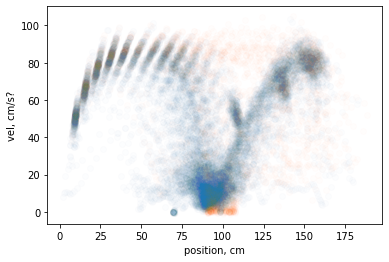

In [68]:
plt.scatter(ds_pos[trial_type==0],ds_vel[trial_type==0],alpha=0.01)
plt.scatter(ds_pos[trial_type==1],ds_vel[trial_type==1],alpha=0.01)
plt.xlabel("position, cm")
plt.ylabel("vel, cm/s?")

In [69]:
len(ds_pos)

15821

(array([3.62769e+05, 1.90350e+05, 2.63528e+05, 2.12566e+05, 1.18489e+05,
        1.02537e+05, 9.37260e+04, 1.03040e+05, 1.20761e+05, 1.10290e+05,
        5.30410e+04, 1.08260e+04, 1.40300e+03, 2.10000e+01, 2.20000e+01,
        2.30000e+01, 2.30000e+01, 2.50000e+01, 2.50000e+01, 3.20000e+01]),
 array([ -6.90171875,   0.94284635,   8.78741146,  16.63197656,
         24.47654167,  32.32110677,  40.16567188,  48.01023698,
         55.85480208,  63.69936719,  71.54393229,  79.3884974 ,
         87.2330625 ,  95.0776276 , 102.92219271, 110.76675781,
        118.61132292, 126.45588802, 134.30045313, 142.14501823,
        149.98958333]),
 <a list of 20 Patch objects>)

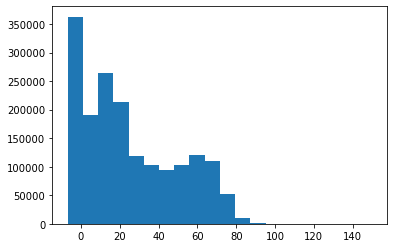

In [64]:
plt.hist(ds_vel,bins=20)

In [6]:
# %time u_vel_t0 = mg.fast_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50,old=True)
# %time u_rate_t0 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50)
# %time u_vel_t1 = mg.fast_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50,old=True)
# %time u_rate_t1 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50)

CPU times: user 534 ms, sys: 26.7 ms, total: 560 ms
Wall time: 558 ms
CPU times: user 1.87 s, sys: 43.1 ms, total: 1.92 s
Wall time: 1.91 s
CPU times: user 819 ms, sys: 36.9 ms, total: 856 ms
Wall time: 840 ms
CPU times: user 4.71 s, sys: 65.5 ms, total: 4.78 s
Wall time: 4.75 s


In [65]:
u_vel_t0, u_rate_t0, u_vel_t1, u_rate_t1 = [],[],[],[]
for session_id in tqdm(range(len(data))):
    [ds_rate, ds_vel, ds_pos, _, trial_type] = data.iloc[session_id].spike_rate_in_time
    if session_id==0:
        ds_vel_all=ds_vel
        u_vel_t0_all = mg.fast_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50,old=True)
        u_vel_t1_all = mg.fast_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50,old=True)
    else:
        assert np.allclose(ds_vel_all,ds_vel)
    u_vel_t0.append(u_vel_t0_all)
    u_rate_t0.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50))
    u_vel_t1.append(u_vel_t1_all)
    u_rate_t1.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50))
data['u_vel_t0']=u_vel_t0
data['u_rate_t0']=u_rate_t0
data['u_vel_t1']=u_vel_t1
data['u_rate_t1']=u_rate_t1
data.to_pickle(f"{session}_u.pkl")

  0%|          | 0/23 [00:00<?, ?it/s]

AttributeError: 'Series' object has no attribute 'spike_rate_in_time'

(array([[502., 489., 565., 531., 533., 525., 583., 532., 533., 576.],
        [388., 450., 585., 516., 537., 534., 594., 547., 579., 639.],
        [477., 549., 523., 565., 543., 523., 563., 534., 571., 521.],
        [351., 573., 555., 511., 569., 581., 514., 530., 569., 616.],
        [457., 570., 517., 566., 524., 519., 577., 534., 552., 553.],
        [440., 198., 627., 567., 570., 525., 600., 558., 618., 666.],
        [467., 545., 511., 527., 546., 588., 542., 516., 558., 569.],
        [309., 575., 546., 554., 559., 522., 544., 541., 590., 629.],
        [470., 555., 512., 570., 533., 544., 570., 524., 524., 567.],
        [535., 549., 514., 527., 537., 564., 546., 481., 510., 606.],
        [477., 496., 575., 537., 516., 539., 589., 551., 528., 561.],
        [382., 379., 580., 557., 542., 561., 557., 567., 593., 651.],
        [547., 534., 531., 525., 465., 557., 464., 532., 495., 719.]]),
 array([9.04821154e-07, 1.00000814e-01, 2.00000724e-01, 3.00000633e-01,
        4.000005

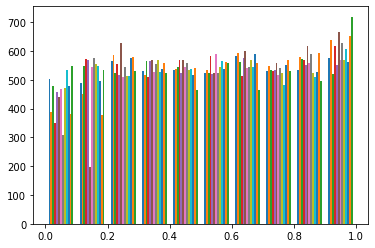

In [40]:
plt.hist(u_rate_t0)